Notebook Imports and Package

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

 # Example 1 A simple cost function
 ## $$ f(x) = x^2 + x + 1 $$

In [6]:
def f(x):
    return x**2 + x + 1

In [12]:
x_1 = np.linspace(start=-3, stop=3, num=100)
print(x_1)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

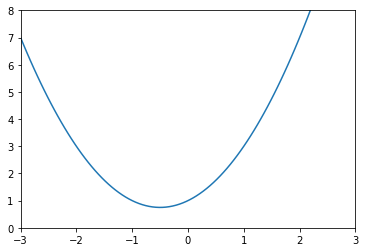

In [15]:
plt.plot(x_1, f(x_1))
plt.xlim([-3,3])
plt.ylim(0,8)
plt.show()

# Slope & Derivative 

In [16]:
def df(x):
    return 2*x + 1

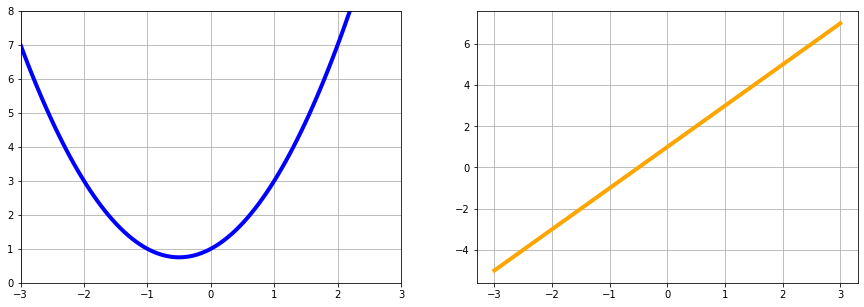

In [36]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 2)
plt.plot(x_1, df(x_1), color='orange', linewidth=4)
plt.grid()


plt.subplot(1, 2, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=4)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.grid()

plt.show()


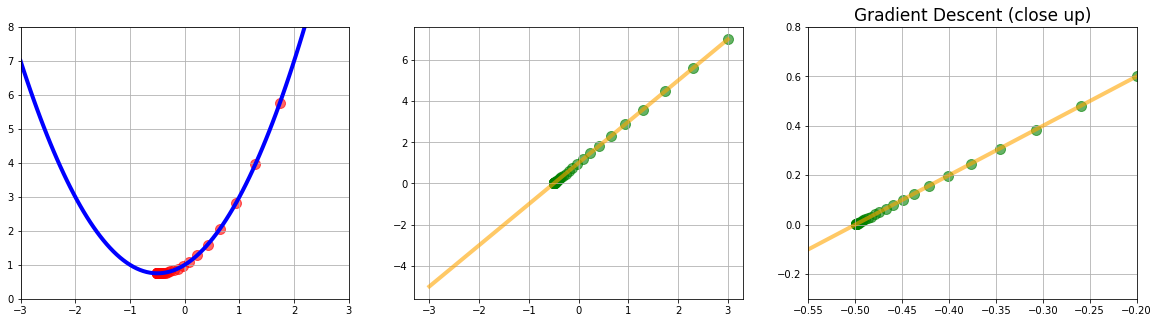

In [69]:
plt.figure(figsize=[20, 5])

#chart 1
plt.title("Gradient Descent (close up)", fontsize=17)
plt.subplot(1, 3, 1)
plt.plot(x_1, f(x_1), color='blue', linewidth=4)
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)
plt.xlim([-3,3])
plt.ylim(0,8)
plt.grid()

#chart 2
plt.subplot(1, 3, 2)
plt.plot(x_1, df(x_1), color='orange', linewidth=4, alpha=0.6)
plt.scatter(x_list, slope_list, color='green', s=100, alpha=0.6)
plt.grid()

#chart 3
plt.subplot(1, 3, 3)
plt.title("Gradient Descent (close up)", fontsize=17)
plt.plot(x_1, df(x_1), color='orange', linewidth=4, alpha=0.6)
plt.scatter(x_list, slope_list, color='green', s=100, alpha=0.6)
plt.xlim([-0.55, -0.2])
plt.ylim([-0.3, 0.8])
plt.grid()
plt.show()



# Example 2 - Multiple Minima vs Initail Guess & Adanced Functions

$$ g(x) = x^4 - 4x^2 + 5 $$

In [70]:
x_2 = np.linspace(-2, 2, 1000)

In [72]:
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x

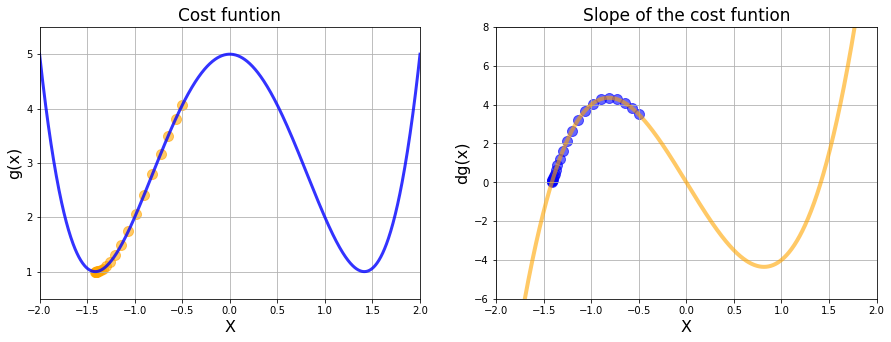

In [106]:
plt.figure(figsize=[15, 5])
# chart 1
plt.subplot(1, 2, 1)
plt.title('Cost funtion', fontsize=17)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='orange', s=100, alpha=0.6)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xlim([-2, 2])
plt.ylim(0.5, 5.5)
plt.grid()

# chart 2 
plt.subplot(1, 2, 2)
plt.title('Slope of the cost funtion', fontsize=17)
plt.plot(x_2, dg(x_2), color='orange', linewidth=4, alpha=0.6)
plt.scatter(list_x, deriv_list, color='blue', s=100, alpha=0.6)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()




plt.show()


In [130]:
def gradient_desent(derivative_func, initial_guess, multiplier, precision):
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(500):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient 

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break 

    return new_x, x_list, slope_list

In [121]:
local_min, list_x, deriv_list = gradient_desent(dg, 0.5, 0.02, 0.001)
print("Local min occurs at :", local_min)
print("Number of steps :", len(list_x))

Local min occurs at : 1.4122375085019094
Number of steps : 23


# Example 3 - Divergence, Overflow and Python Tuples
$$ h(x) = x^5 - 2x^4 + 2 $$

In [111]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3


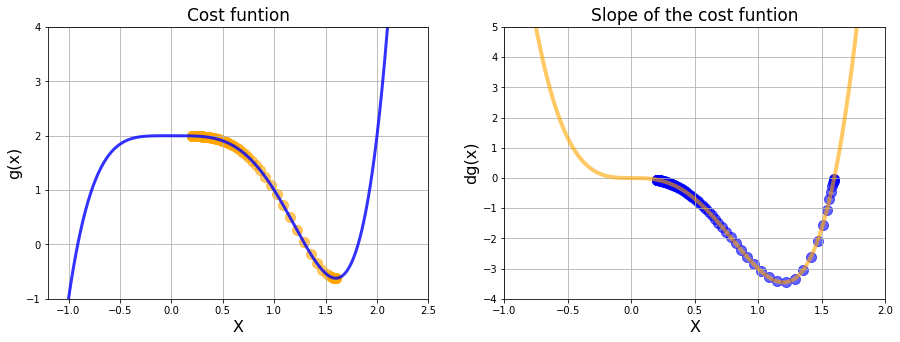

Local min occurs at : 1.5989534547394717
Cost at this minimum is : -0.6214287992331258
Number of steps 117


In [138]:
local_min, list_x, deriv_list = gradient_desent(dh, 0.2, 0.02, 0.001)
plt.figure(figsize=[15, 5])
# chart 1
plt.subplot(1, 2, 1)
plt.title('Cost funtion', fontsize=17)
plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='orange', s=100, alpha=0.6)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.xlim([-1.2, 2.5])
plt.ylim(-1, 4)
plt.grid()

# chart 2 
plt.subplot(1, 2, 2)
plt.title('Slope of the cost funtion', fontsize=17)
plt.plot(x_3, dh(x_3), color='orange', linewidth=4, alpha=0.6)
plt.scatter(list_x, deriv_list, color='blue', s=100, alpha=0.6)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.grid()

plt.show()

print('Local min occurs at :',local_min)
print('Cost at this minimum is :', h(local_min))
print('Number of steps', len(list_x))